# Predicting diabetes for a given patient

Table of Contents:
- [Data Description](#1) 
- [Project Objective](#2)
- [Data Preparation](#3)
- [Data Exploration](#4) 
- [Predictive Modeling - Overview](#5) 
- [Feature Ranking & Selection](#6) 
- [Model Evaluation](#7)
- [Performance Comparison](#8)
- [Model Evaluation Metrics](#9)
- [Limitations](#10)
- [Summary & Conclusion](#11)
- [Reference](#12)


## Data Description <a class="anchor" id="1"></a> 

The report aims to model the Pima Indians Diabetes data,a binary classification problem and predict whether a person has diabetes or not based on the information available about the patient such as glucose levels, body mass index (BMI), blood pressure, etc using different Machine Learning algorithms. The dataset is originally from the 'National Institute of Diabetes and Digestive and Kidney Diseases' and is sourced from Kaggle.The dataset provides information about 767 female patients that are above 21 years of age belonging to the Pima Indian heritage (subgroup of Native Americans).The descriptive features contain 8 numeric features. The target feature 'Outcome' has two classes defined as '0' and '1' where 0 denotes non-diabetic patient and 1 denotes diabetic patient.

**Feature Description:**
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration 
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: Insulin serum level (mu U/ml)
* BMI: Body mass index (Weight (kg)/height(m)2)
* DiabetesPedigreeFunction: Score that determine the likelihood of diabetes based on family history
* Age: Age (years)
* Outcome: Target Class variable (0 if non-diabetic, 1 if diabetic)

## Project Objective <a class="anchor" id="2"></a> 

The main aim of our project is to correctly predict the true positive class of the target feature (diabetic patients) with a minimal amount of error in the prediction of the positive class.



## Data Preparation <a class="anchor" id="3"></a> 


The dataset needs to be preprocessed and transformed into clean data before building a stastical model for the data. 

### Reading the dataset

The diabetes.csv file is imported using the read_csv function. We have set the random state to 99 at the beginning of our analysis in order to replicate our results later on.


In [1]:
#!pip install --upgrade altair
#!pip install vega vega_datasets

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None) 

diabetes = pd.read_csv("diabetes.csv",sep=",",header=0)

The dimensions of the dataset and the datatypes of features are checked to ensure that the dataframe has been imported correctly and that the feature types match the description provided about each feature i.e the descriptive features are numeric.



In [3]:
print(f"Shape of the dataset is {diabetes.shape} \n")
print("Data types as follows: ")
print(diabetes.dtypes)

Shape of the dataset is (768, 9) 

Data types as follows: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Checking for missing values


We need to ensure that there are no missing values in any feature so that it does not interfere with the Machine Learning algorithms applied to this dataset at a later stage. We check for missing values and find the sum of missing values.



In [4]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can notice that there are zero missing values in the entire dataset. Next we check for the summary statistics of the descriptive features.

In [5]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of all features</b>'))
diabetes.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In the descriptive summary table we can observe that the features Glucose,BloodPressure,SkinThickness,Insulin & BMI have their minimum value as zero which does not seem to be logical.These zero values seem to be potential missing values and have been re-encoded as NaN to identify them as missing values.

In [6]:
diabetes_impute = diabetes.copy()
diabetes_impute[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabetes_impute[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

We again check for missing values in the dataset and the unusual(0) values have now been re-encoded as missing values.



In [7]:
diabetes_impute.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The missing values have been imputed with the median value of the respective features.Dropping the observations with missing values would reduce the size of the dataset considerably.



In [8]:
#Imputing missing values with median
impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
print("Imputing the missing values with median for the following features:\n")
for col in impute_features:
    median = np.round(diabetes_impute[col].median(), 3)
    print(col + ': Median = ' + str(median))
    diabetes_impute[col] = diabetes_impute[col].fillna(median)

Imputing the missing values with median for the following features:

Glucose: Median = 117.0
BloodPressure: Median = 72.0
SkinThickness: Median = 29.0
Insulin: Median = 125.0
BMI: Median = 32.3


The 10 randomly selected rows is displayed as follows:



In [9]:
diabetes.sample(n=10, random_state=99)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
129,0,105,84,0,0,27.9,0.741,62,1
113,4,76,62,0,0,34.0,0.391,25,0
288,4,96,56,17,49,20.8,0.340,26,0
610,3,106,54,21,158,30.9,0.292,24,0
6,3,78,50,32,88,31.0,0.248,26,1
22,7,196,90,0,0,39.8,0.451,41,1
258,1,193,50,16,375,25.9,0.655,24,0
392,1,131,64,14,415,23.7,0.389,21,0
593,2,82,52,22,115,28.5,1.699,25,0
143,10,108,66,0,0,32.4,0.272,42,1


Before performing any further preprocessing steps we split the dataset into a set of descriptive and target feature respectively.The target feature is already encoded as 0 and 1.


In [10]:
data = diabetes_impute.drop(columns = 'Outcome')

target = diabetes_impute['Outcome']

### Scaling descriptive features

Normalizing all the descriptive numerical features using min max scaling method using the preprocessing module in sklearn.

In [11]:
from sklearn import preprocessing

data_normalized = preprocessing.MinMaxScaler().fit_transform(data)

diabetes_df = pd.DataFrame(data_normalized, 
                                    columns=data.columns)


In [12]:
diabetes_df.sample(n=10, random_state=99)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
129,0.000000,0.393548,0.612245,0.239130,0.133413,0.198364,0.283091,0.683333
113,0.235294,0.206452,0.387755,0.239130,0.133413,0.323108,0.133646,0.066667
288,0.235294,0.335484,0.326531,0.108696,0.042067,0.053170,0.111870,0.083333
610,0.176471,0.400000,0.306122,0.152174,0.173077,0.259714,0.091375,0.050000
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333
22,0.411765,0.980645,0.673469,0.239130,0.133413,0.441718,0.159266,0.333333
258,0.058824,0.961290,0.265306,0.097826,0.433894,0.157464,0.246371,0.050000
392,0.058824,0.561290,0.408163,0.076087,0.481971,0.112474,0.132792,0.000000
593,0.117647,0.245161,0.285714,0.163043,0.121394,0.210634,0.692143,0.066667
143,0.588235,0.412903,0.428571,0.239130,0.133413,0.290389,0.082835,0.350000


## Data Exploration <a class="anchor" id="4"></a> 

We explore the data by plotting various graphs to understand the data better and check how the features of the dataset are related to each other.We start by plotting a correlation matrix to find any linear relation between the features.  

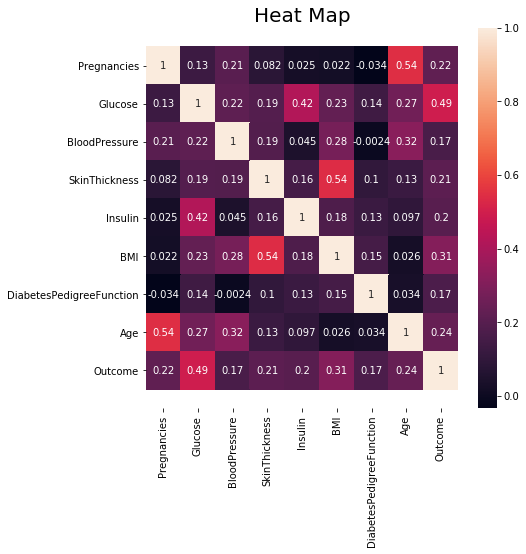

In [13]:
Corr= diabetes_impute.corr()
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(Corr, annot=True)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title("Heat Map", fontsize=20)
plt.show()

### Univariate Visualization 

**Bar plot of diabetic and non-diabetic patients:**

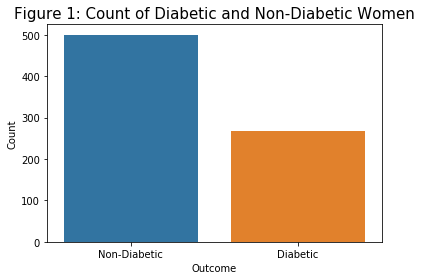

In [14]:
import seaborn as sns
ax=sns.countplot(diabetes_impute['Outcome'])
plt.title('Figure 1: Count of Diabetic and Non-Diabetic Women', fontsize=15)
ax.set_xticklabels(["Non-Diabetic","Diabetic"])
ax.set_ylabel("Count")
plt.show()

In [15]:
diabetes_impute['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In figure 1, we can see that there were 268 women who were diagnosed with diabetes whereas 500 were not. It can be seen that the the number of women with diabetes is almost half than those who are healthy. The positive class (diabetic patient) is about 34% in the dataset indicating that there is a class imbalance problem.


**Boxplot of Age:**

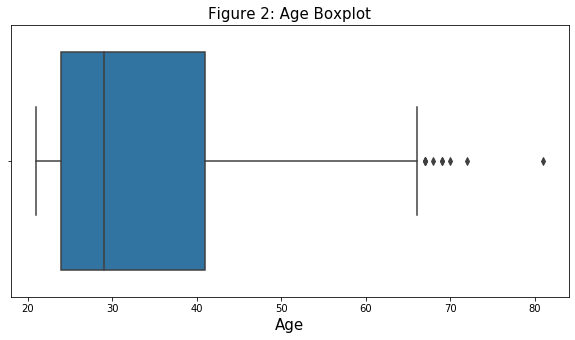

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=diabetes_impute["Age"]).set_title("Figure 2: Age Boxplot", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.show()

As per figure 2, there are 6 outliers. However these are well within the normal age range. From the plot, it can be seen that the dataset contains observations of women between the age range 25-40. The box plot is positively skewed as well.  

**Histogram of Blood pressure:**

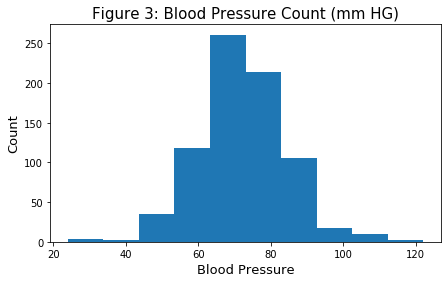

In [17]:
plt.figure(figsize=(7, 4))
plt.hist("BloodPressure",data=diabetes_impute)
plt.xlabel('Blood Pressure', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Figure 3: Blood Pressure Count (mm HG)', fontsize=15)
plt.show()

From the histogram representation of the blood pressure (BP) column in figure 3, it can be seen that majority of the women have their BP ranged between 60-90 mm Hg. The histogram appears to be normally distributed.

**Histogram of BMI**

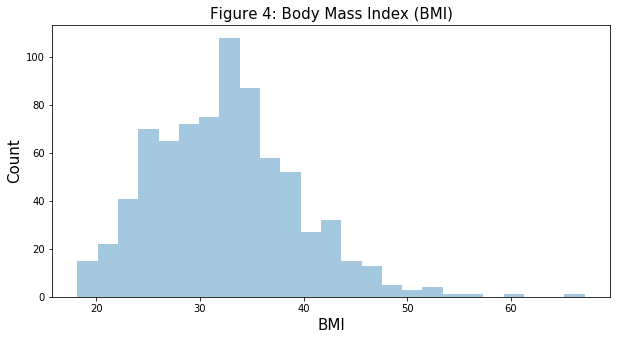

In [18]:
plt.figure(figsize=(10, 5))
sns.distplot(diabetes_impute["BMI"], kde=False)
plt.ylabel("Count", fontsize=15)
plt.xlabel("BMI", fontsize=15)
plt.title('Figure 4: Body Mass Index (BMI)', fontsize=15)
plt.show()

Upon plotting the BMI histogram in figure 4, it can be seen that majority of the women have their body mass index ranging between 30-40. The histogram appears to be slightly right skewed. 

### Bivariate visualization

**Box plot of Glucose levels in diabetic & non-diabetic women:**

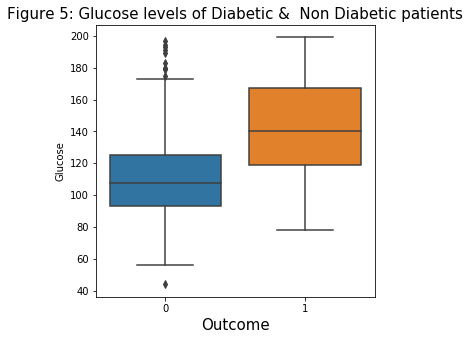

In [19]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_impute).axes.set_title("Figure 5: Glucose levels of Diabetic &  Non Diabetic patients", fontsize=15)
plt.xlabel("Outcome", fontsize=15)
plt.show()

As per figure 5, it can be seen that most of the non diabetic women have their glucose concentration ranged between 90-130. However, the glucose concentration in diabetic women ranges from 120 to 170. There is a significant difference in the concentration level of glucose amongst diabetic and non-diabetic women. It can be inferred that diabetic women have a higher concentration of glucose in their body whereas non-diabetic women have a relatively lower concentration of glucose in their body.

**Scatter plot of BMI vs skin thickness**:

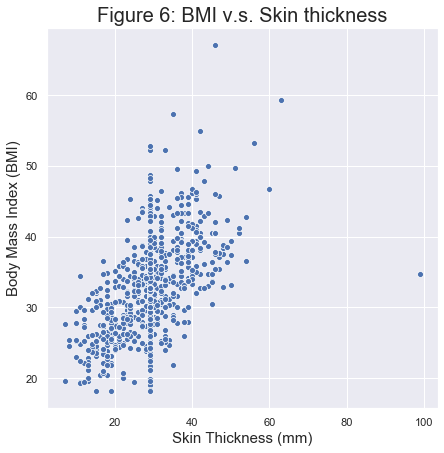

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 7))
sns.scatterplot(x="SkinThickness", y="BMI", data=diabetes_impute);
plt.xlabel('Skin Thickness (mm)', fontsize=15)
plt.ylabel('Body Mass Index (BMI)', fontsize=15)
plt.title('Figure 6: BMI v.s. Skin thickness', fontsize=20)
plt.show()


From the scatter plot Skin Thickness vs BMI in figure 6, we can infer that BMI increases with increase in Skin Thickness. Most of the data points are concerntrated around 30 because we replaced the missing values with the median values.

**Blood pressure of diabetic & non-diabetic patients**:

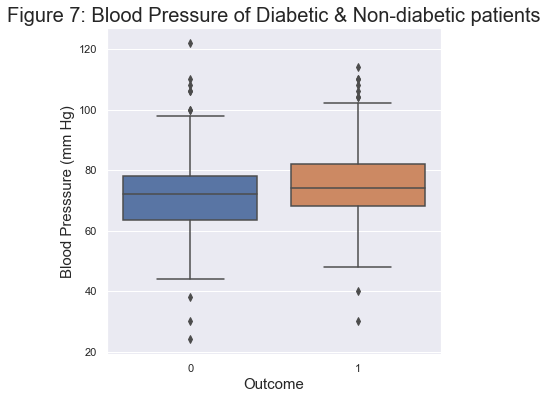

In [21]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_impute).set_title("Figure 7: Blood Pressure of Diabetic & Non-diabetic patients", fontsize=20)
plt.ylabel("Blood Presssure (mm Hg)", fontsize=15)
plt.xlabel("Outcome", fontsize=15)
plt.show()

From figure 7, we can infer that majority of the non-diabetic women have a slightly lower blood pressure in comparison with that of diabetic women. It is interesting to note that there is more variation in the blood pressure scores of non diabetic women than that of diabetic ones.

**Diabetes Pedigree function of diabetic & non-diabetic women:**

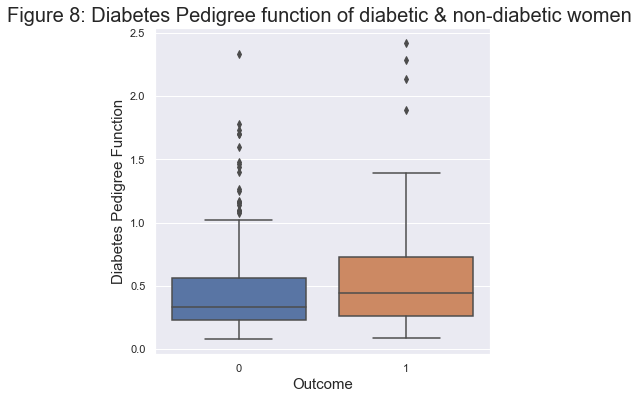

In [22]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_impute).set_title("Figure 8: Diabetes Pedigree function of diabetic & non-diabetic women ", fontsize=20)
plt.ylabel("Diabetes Pedigree Function", fontsize=15)
plt.xlabel("Outcome", fontsize=15)
plt.show()

DiabetesPedigreeFunction tells us how likely a person will get diagnosed with diabetes on the basis of the family history. From figure 8, we can observe that women with diabetes have a higher score than the non diabetic ones. However, the difference isn't much. It is interesting to note that there are a lot of outliers present in the boxplot of non diabetic women. Most of these scores are above 1. It can be said that non diabetic women too can get diagnosed with diabetes in the foreseable future.

### Multivariate visualisation


**Average Pregnancy vs Age for diabetic & non-diabetic women:**

<Figure size 2160x4320 with 0 Axes>

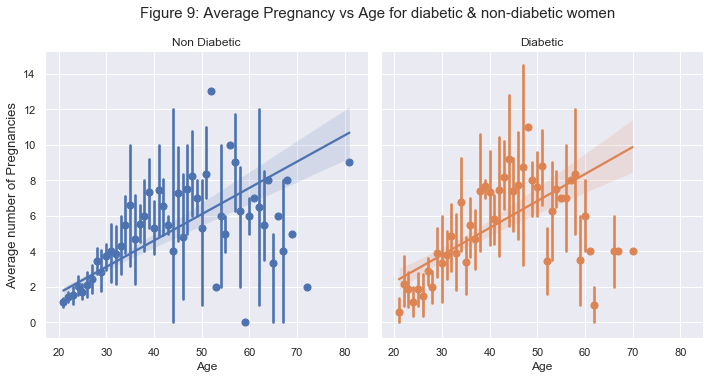

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 60))
lm=sns.lmplot(x="Age", y="Pregnancies", col="Outcome", hue="Outcome", data=diabetes_impute,x_estimator=np.mean, x_jitter=2)
fig = lm.fig
a1 = fig.axes[1]
a1.set_title("Diabetic")
a2=fig.axes[0]
a2.set_title("Non Diabetic")
fig.suptitle("Figure 9: Average Pregnancy vs Age for diabetic & non-diabetic women", size=15, verticalalignment="top", horizontalalignment="center", x=0.53, y=1.05)
a2.set_ylabel("Average number of Pregnancies", fontsize=13)
plt.show()

From figure 9 with Outcome as the filtering variable, it can be seen that the age and pregnancy share a positively linear correlation upto a certain age in both the cases. The plot represents the average no. of pregnancy a diabetic and a non diabetic woman has. For non diabetic women, beyond the age of 51, as the age increases, the average no. of pregnancy decreases. And for diabetic women, beyond the age of 45, as the age increases, the average no. of pregnancy decreases. Hence it can be said that with the course of time, average no. of pregnancy decreases. 

**Insulin vs Glucose for diabetic & non-diabetic women:**

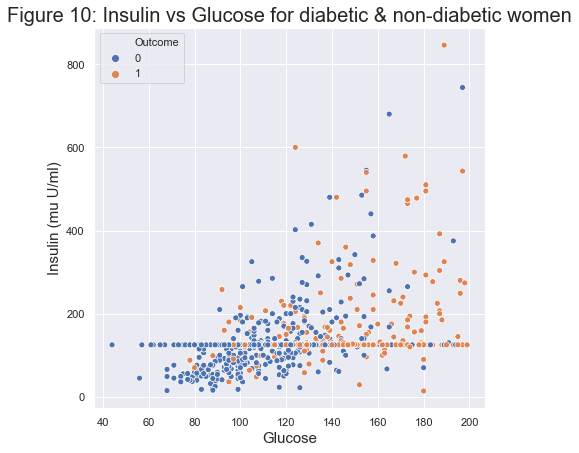

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 7))
lm=sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data=diabetes_impute)
#new=["Non-Diabetic","Diabetic"]
#for t, l in zip(lm._legend.texts,new):t.set_text(1)
plt.xlabel('Glucose', fontsize=15)
plt.ylabel('Insulin (mu U/ml)', fontsize=15)
plt.title('Figure 10: Insulin vs Glucose for diabetic & non-diabetic women', fontsize=20)
plt.show()

From 10 with Outcome as the filtering variable, it can be seen that glucose and insulin share a linear correlation. The plot helps us to draw relation between glucose and insulin level of diabetic and non diabetic women. We can observe a set of clustered dotted points resembling a horizontal line being plotted along the x axis. These points are the missing values which were earlier replaced with the median values. 

**BMI vs Skin Thickness for diabetic vs non-diabetic patients:**

<Figure size 2160x5040 with 0 Axes>

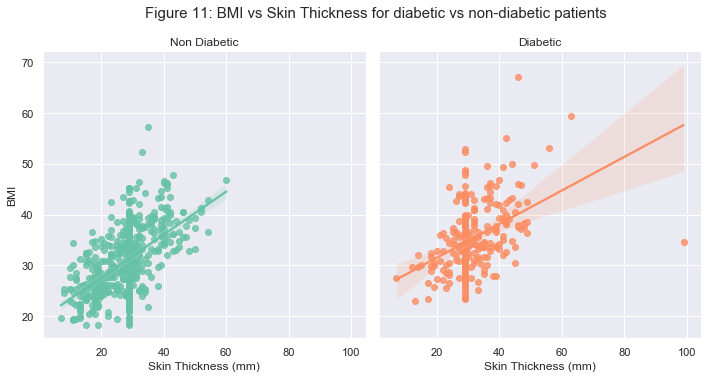

In [25]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 70))
lm=sns.lmplot(x="SkinThickness", y="BMI", hue="Outcome", col="Outcome", data=diabetes_impute, palette="Set2")
fig = lm.fig
a1 = fig.axes[1]
a1.set_title("Diabetic")
a1.set_xlabel("Skin Thickness (mm)")
a2=fig.axes[0]
a2.set_title("Non Diabetic")
a2.set_xlabel("Skin Thickness (mm)")
fig.suptitle("Figure 11: BMI vs Skin Thickness for diabetic vs non-diabetic patients", size=15, verticalalignment="top", horizontalalignment="center", x=0.53, y=1.05)

plt.show()

From 11 with Outcome as the filtering variable, it can be seen that skin thickness and BMI  share a positively linear correlation. The plot helps us to draw relation between skin thickness and BMI of diabetic and non diabetic women. With the course of time, as skin thickness increases, the BMI increases too. In both the cases, We can observe a set of clustered dotted points resembling a vertical line being plotted along the y axis. These points are the missing values which were earlier replaced with the median values. It can be deduced that diabetic women relatively have a higher concentration of skin thickness and BMI.  

**Blood Pressure vs average number of pregnancies for diabetic and non diabetic women:**

<Figure size 2160x3600 with 0 Axes>

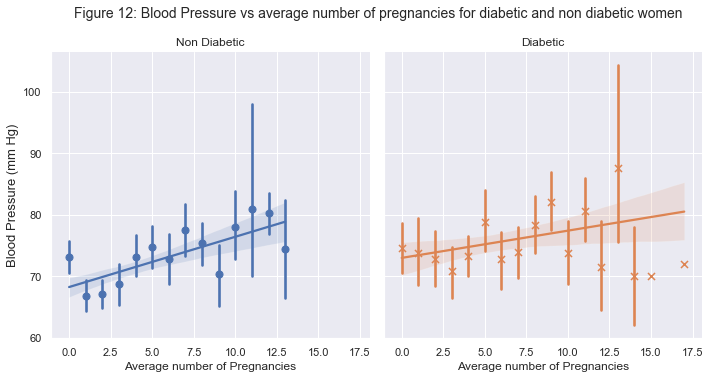

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 50))
lm=sns.lmplot(x="Pregnancies", y="BloodPressure", hue="Outcome", col="Outcome", data=diabetes_impute, x_estimator=np.mean, x_jitter=2, markers=["o", "x"])
fig = lm.fig
a1 = fig.axes[1]
a1.set_title("Diabetic")
a1.set_xlabel("Average number of Pregnancies")
a2=fig.axes[0]
a2.set_title("Non Diabetic")
a2.set_xlabel("Average number of Pregnancies")
fig.suptitle("Figure 12: Blood Pressure vs average number of pregnancies for diabetic and non diabetic women", size=14, verticalalignment="top", horizontalalignment="center", x=0.53, y=1.05)
a2.set_ylabel("Blood Pressure (mm Hg)", fontsize=13)
plt.show()

From figure 12 with Outcome as the filtering variable, it can be seen that the number of pregnancy and blood pressure share a linear correlation for both diabetic and non-diabetic women. Diabetic women seem to have a relatively higher blood pressure than that of non diabetic womens'. Hence it can be said that with increase in number of pregancies, the blood pressure too increases.

## Predictive Modeling - Overview <a class="anchor" id="5"></a> 

For the dataset which poses a binary classification problem, we propose the following five classifier models to predict whether a person is diabetic or not.

* K-Nearest Neighbors (KNN)
* Decision trees (DT) 
* Random Forest(RF) 
* Naive Bayes (NB) 
* Support vector Machine(SVM) 

The predictive modeling phase begins with splitting the dataset into training and test set in a 70:30 ratio using stratification as the dataset suffers from a class imbalance problem wherein the target feature has more number of non-diabetic patients. We have used the entire dataset for building our statistical models since we do not have a very large dataset. We determine the top 5 features using the Random Forest Importance method(RFI) that would help contribute most to the target feature before fitting any classifier to the dataset. A 5-fold 3-repeats stratified cross-validation is performed for tuning the hyperparameters of the classifier models and fit the classifiers with the best performing hyperparameters. AUC score is used as the performance metric for our project as our ultimate goal is to find a model that rightly distinguishes between patients with diabetes and no diabetes(minimum error in predicting the positive labels).The hyperparameter tuning results are also visualized by comparing the performance given by different parameter combinations.After the five classifier models have been fine-tuned with the best hyperparameter values, we compare the performance of the classifiers on the test data that is hidden from the models to avoid bias.A paired t-test is performed to see that the better performing model has a statistically significant difference than other models. We also consider other evaluation metrics such as F1-score considering the imbalance in the target class and compare the models based on the F1-score. 

### Test Train Split

We split the dataset as 70% training set and 30% test set partitions using stratification. Stratification has been used to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.



In [27]:
from sklearn.model_selection import train_test_split

diabetes_np=diabetes_df.values
diabetes_train, diabetes_test, \
target_train, target_test = train_test_split(diabetes_np, target.values, 
                                                    test_size = 0.3, random_state=99,stratify = target)
                                                    

print(diabetes_train.shape)
print(diabetes_test.shape)

(537, 8)
(231, 8)


## Feature Selection & Ranking <a class="anchor" id="6"></a> 


We identify the top 5 features as selected by Random Forest Importance (RFI) filter method. We will use only those features for our prediction modeling in order to improve the accuracy and reduce overfitting issues.


In [28]:
from sklearn.ensemble import RandomForestClassifier

num_features = 5
model_rfi = RandomForestClassifier(n_estimators=100, random_state=99)
model_rfi.fit(diabetes_df, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = diabetes_df.columns[fs_indices_rfi].values
best_features_rfi

array(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin'],
      dtype=object)

In [29]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi


array([0.2688559 , 0.15826588, 0.13301227, 0.12154832, 0.08522341])

Feature importance visualization:

In [30]:
%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('html') # required in Jupyter notebooks

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title='Feature Importance based on Random forest importance filter method'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

The most important feature based on the method is glucose with a importance value of 0.268 followed by BMI, Age, DiabetesPedigreeFunction and Insulin.



In [31]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'coral')


alt.Chart(...)

From the above figure, we can infer that glucose level, BMI, age, diabetes pedigree function and insulin levels have significant influence on the model, especially glucose level and BMI.

Selecting the most important features for modeling:

In [32]:
diabetes_train_features = diabetes_train[:, fs_indices_rfi]
diabetes_test_features = diabetes_test[:, fs_indices_rfi]


## Model Evaluation <a class="anchor" id="7"></a> 

We perform a stratified 5-fold cross-validation with 3 repetitions using the RepeatedStratifiedKFold function for tuning the models specified on the training data and then testing the models on the test data. Stratification ensures that the proportion of the two labels in both train and test sets are the same as the proportion in the full dataset in each cross-validation repetition since the target feature has a fewer number of diabetic labels as compared to non diabetic labels. 

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, 
                                    random_state=99)

### K-Nearest Neighbour Classifier Model Hyperparameter Tuning


We find the best set of hyperparameters by searching through all possible combinations of hyperparameters during the training phase using the gridsearch method for KNN hyperparameter tuning via cross-validation.
The KNN hyperparameters considered for the tuning process are as follows:
* Number of neighbors (n_neighbors) - 1 to 20
* Distance metric (p) - 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski)

In [34]:
params_KNN = {'n_neighbors': range(1,21), 'p': [1, 2, 5]}


We consider the AUC score as the performance metric to optimize and evaluate.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc')


Fitting the KNN model on the relevant features and finding the mean cross-validation AUC score with  optimal parameters.

In [36]:
gs_KNN.fit(diabetes_train_features, target_train);



Fitting 15 folds for each of 60 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.4s finished


In [37]:
gs_KNN.best_params_


{'n_neighbors': 14, 'p': 1}

In [38]:
gs_KNN.best_score_


0.8429387658335027

 The best performing KNN model has 14 nearest neighbors and  𝑝=1 i.e  the Manhattan distance with a mean AUC score of 0.843 for the best five features.



In [39]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean","Minkowski"])


Plotting the hyperparameter tuning results from the cross-validation using the altair module. The plot below shows that K = 14 with the Manhattan distance metric (p=1) performs better than other hyperparameter combinations.



In [40]:
import altair as alt

alt.Chart(results_KNN, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='Mean AUC Score', scale=alt.Scale(zero=False)),
    color='metric'
)


alt.Chart(...)

##  Decision Tree Classifier Model Hyperparameter Tuning


Determining the best possible hyperparameter combinations for a Decision Tree classifier using the gridsearch method.We want to find the optimal combination that maximizes information gain.
The Decision Tree hyperparameter values considered for the tuning process are :
*  Maximum depth (max_depth)  - 1 to 10
*  Minimum sample split (min_samples_split) - 2 to 8
*  Criterion - {Entropy,Gini index}

Fitting the Decision tree model that maximizes information gain on the relevant features and finding the mean cross-validation AUC score with  optimal parameters.

In [41]:
from sklearn.tree import DecisionTreeClassifier

params_DT = {'criterion': ['entropy','gini'],
             'max_depth': [1,2,3, 4, 5, 6, 7, 8,9,10],
             'min_samples_split': [2,3,4,5,6,7,8]}
            
gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=99), 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

gs_DT.fit(diabetes_train_features, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 15 folds for each of 140 candidates, totalling 2100 fits


[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed:    8.1s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=99),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=99,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
   

In [42]:
gs_DT.best_params_


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [43]:
gs_DT.best_score_


0.8037136760820972

The best performing decision tree model using the entropy split criterion has a maximum depth of 3 and minimum split value of 2 samples with a mean AUC score of 0.803.



In [44]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']


Visualising the DT grid search results for the five features.

In [45]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean AUC Score', scale=alt.Scale(zero=False)),
    color='criterion'
)

alt.Chart(...)

###  Random Forest Classifier Model Hyperparameter Tuning


Fitting a Random Forest Classifier model by determining the optimal combinations of the number of decision trees in the forest,minimum number of data points placed in a node before the node is split and the maximum number of levels considered by each tree.
The Random Forest model hyperparameter values considered for the tuning process are :
* No of decision trees (n_estimators) : 100,150,300
* Maximum depth (max_depth) - 2,5,7,10,12


Fitting the Random Forest model for the relevant features and finding the mean cross-validation AUC score with optimal parameters.

In [46]:
from sklearn.ensemble import RandomForestClassifier

params_RF = {'n_estimators': [100,150,300],
             'max_depth': [2,5,7,10,12]
            }


gs_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=99), 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring='roc_auc')

gs_RF.fit(diabetes_train_features, target_train);

Fitting 15 folds for each of 15 candidates, totalling 225 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-2)]: Done 225 out of 225 | elapsed:   59.2s finished


In [47]:
gs_RF.best_params_


{'max_depth': 5, 'n_estimators': 300}

In [48]:
gs_RF.best_score_


0.8447449705344442

The best performing Random Forest model has a maximum depth of 5 and 300 number of decision trees with a mean AUC score of 0.844.

In [49]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']



Visualising the Random forest grid search results for the five features.We observe that the Random forest model with a maximum depth of 5 and n_estimators value of 300 performs better than the other hyperparameter combinations.

In [50]:
alt.Chart(results_RF, 
          title='RF Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean AUC Score', scale=alt.Scale(zero=False)),
    color='n_estimators:N' # N is for nominal
)


alt.Chart(...)

###  Gaussian Naive Bayes Classifier Model Hyperparameter Tuning


Fitting a Gaussian Naive Bayes model by optimizing the hyperparameter 'var_smoothing' i.e a variant of Laplace smoothing.Power transformation is applied on the relevant features so as to follow a Gaussian distribution.
The Gaussian Naive Bayes model hyperparameter values considered for the tuning process :
* var_smoothing : 10^0 to 10^-9 for 100 different values

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

diabetes_train_features_transformed = PowerTransformer().fit_transform(diabetes_train_features)

gs_NB.fit(diabetes_train_features_transformed, target_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.7s finished


In [52]:
gs_NB.best_params_


{'var_smoothing': 0.533669923120631}

In [53]:
gs_NB.best_score_


0.8483770236401814

The optimal NB model with a variance smoothing value of 0.533 has an AUC score of 0.8483.



In [54]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


Visualising the Naive bayes grid search results for the five features.We observe that the Naive Bayes model with a var smoothing of 0.533 performs better than the other hyperparameter combinations.

In [55]:
alt.Chart(results_NB, 
          title='NB Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('var_smoothing', title='Var. Smoothing'),
    alt.Y('test_score', title='Mean AUC Score', scale=alt.Scale(zero=False))
).interactive()

alt.Chart(...)

###  Support Vector Machine Classifier Model Hyperparameter Tuning


Fitting a Support Vector Machine model for the 5 relevant features in the dataset by determining the best possible hyperparameter combination using the gridsearch method.The hyperparameters defined for the SVM tuning involves the type of kernel i.e type of hyperplane used to separate the data,'gamma' value for the non-linear hyperplanes and the error term penalty parameter 'C' that controls the trade off between smooth decision boundary and classifying the training points correctly.The SVM model hyperparameter values considered for the tuning process are as follows:
* Kernel: Linear, Radial basis function(rbf)
* C : 0.001, 0.10, 0.1, 10, 25, 50,100,1000
* gamma : 1e-2, 1e-3, 1e-4, 1e-5 (for rbf kernel only) 

In [56]:
from sklearn.svm import SVC

params_SVM = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100]}
                   ]

gs_SVM = GridSearchCV(estimator=SVC(), 
                     param_grid=params_SVM, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')


gs_SVM.fit(diabetes_train_features, target_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 15 folds for each of 35 candidates, totalling 525 fits


[Parallel(n_jobs=1)]: Done 525 out of 525 | elapsed:    5.5s finished


In [57]:
gs_SVM.best_params_


{'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}

In [58]:
gs_SVM.best_score_


0.838727900833164

The best performing SVM model turned out to be the rbf kernel with the gamma score of 0.01 and 'C' error term penalty value of 25 with the mean AUC crossvalidation score of 0.838.


In [59]:
results_SVM = pd.DataFrame(gs_SVM.cv_results_['params'])
results_SVM['test_score'] = gs_SVM.cv_results_['mean_test_score']




The plot shows the grid search results for the SVM classifier model.The SVM model with the 'rbf' kernel having gamma score of 0.01 and  'C' error term penalty outperforms other hyperparameter combinations.

In [60]:
import altair as alt

alt.Chart(results_SVM, 
          title='SVM Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('C', title='C'),
    alt.Y('test_score', title='Mean AUC Score', scale=alt.Scale(zero=False)),
    color='kernel'
)

alt.Chart(...)

## Performance comparison of classifier models <a class="anchor" id="8"></a> 

In the hyperparameter tuning phase, we only used the top 5 relevant features for training the various classifier models on 537 observations of the training data.We found the best hyperparameter values that gave the optimal performance score for each of the five classifiers. 
We now compare the performance of the classifier models by fitting each tuned classifier with the best set of hyperparameter values on the test data to determine which classifier algorithm performs the best.A 5-fold stratified cross-validation with 3 repetitions was performed on each of the five classifier with the seed set to the same value used in each of the cross-validation phases.We then compare the best performing tuned classifier on the test data with the other classifiers using a pairwise t-test for the AUC performance score to determine if there is any statistical significant difference between the performance of the tuned classifier models.

In [61]:
from sklearn.model_selection import cross_val_score
cv_test_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, 
                                    random_state=99)

cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=diabetes_test_features,
                                 y=target_test, 
                                 cv=cv_test_method, 
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8160743464052287

In [62]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=diabetes_test_features,
                                 y=target_test, 
                                 cv=cv_test_method, 
                                 scoring='roc_auc')
cv_results_DT.mean()

0.7336315359477124

In [63]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=diabetes_test_features,
                                 y=target_test, 
                                 cv=cv_test_method, 
                                 scoring='roc_auc')
cv_results_RF.mean()

0.8005800653594772

In [64]:
diabetes_test_features_transformed = PowerTransformer().fit_transform(diabetes_test_features)

cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                 X=diabetes_test_features_transformed,
                                 y=target_test, 
                                 cv=cv_test_method, 
                                 scoring='roc_auc')
cv_results_NB.mean()

0.8205555555555556

In [65]:
cv_results_SVM = cross_val_score(estimator=gs_SVM.best_estimator_,
                                 X=diabetes_test_features,
                                 y=target_test, 
                                 cv=cv_test_method, 
                                 scoring='roc_auc')
cv_results_SVM.mean()

0.7985294117647059

The five tuned classifier models were fitted on the same test data and it was found that the Naive-Bayes classifier model has a better AUC performance score compared to the other classifier models.We run the pairwise t-tests to determine whether the Naive Bayes classifier performance is statistically significant than the other models.

In [66]:
from scipy import stats

# Comparing NB with other tuned classifiers 
# p-value < 0.05 indicates a statistically significant result

print(stats.ttest_rel(cv_results_NB, cv_results_KNN))
print(stats.ttest_rel(cv_results_NB, cv_results_DT))
print(stats.ttest_rel(cv_results_NB, cv_results_RF))
print(stats.ttest_rel(cv_results_NB, cv_results_SVM))


Ttest_relResult(statistic=0.3933054058895807, pvalue=0.7000181998684651)
Ttest_relResult(statistic=5.179783403888034, pvalue=0.00013965758354926485)
Ttest_relResult(statistic=2.070843380219358, pvalue=0.057338092812659114)
Ttest_relResult(statistic=2.916341453342852, pvalue=0.011272005945876917)


As per the results,Gaussian Naive-Bayes classifier statistically performs better than most classifier models at a 95% significance level on the test data with a p-value smaller than 0.05 indicating a statistically significant difference.However, we can also consider the K-NN classifier model as there is not much difference in the performance score in comparison to the Naive Bayes classifier. 



## Model Evaluation Metrics <a class="anchor" id="9"></a> 

Performance comparison of the model based on the other evaluation metrics for the test data:
* Confusion matrix
* Accuracy
* Precision
* Recall
* F1 Score (harmonic average of precision and recall)


Computing the predictions for the test data containing only the relevant features for each of the classifier:

In [67]:
#KNN 
pred_KNN = gs_KNN.predict(diabetes_test_features)

#DT
pred_DT = gs_DT.predict(diabetes_test_features)

#NB
pred_NB = gs_NB.predict(diabetes_test_features_transformed)

#RF
pred_RF = gs_RF.predict(diabetes_test_features)

#SVM
pred_SVM = gs_SVM.predict(diabetes_test_features)


Confusion matrix for the 5 classifier models as follows:

In [68]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(target_test, pred_RF))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for SVM") 
print(metrics.confusion_matrix(target_test, pred_SVM))


Confusion matrix for K-Nearest Neighbor
[[132  18]
 [ 35  46]]

Confusion matrix for Decision Tree
[[121  29]
 [ 33  48]]

Confusion matrix for Random Forest
[[127  23]
 [ 29  52]]

Confusion matrix for Naive Bayes
[[130  20]
 [ 31  50]]

Confusion matrix for SVM
[[130  20]
 [ 40  41]]


The classification report for the models as follows:

In [69]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(target_test, pred_RF))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for SVM") 
print(metrics.classification_report(target_test, pred_SVM))



Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.62      0.59      0.61        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.64      0.67        81

    accuracy                           0.77       231


As stated earlier,we used the AUC performance metric to determine the best performing model as the main objective was to identify the model that accurately predicts the diabetic class of patients better in comparison to the wrongly predicted diabetic class since this dataset suffers from a class imbalance problem. We can also consider the F1-score as the performance measure for the data in which case the Random Forest classifier performs better than the other models.

## Limitations & Future Scope <a class="anchor" id="10"></a> 

The approach taken for building our statistical models poses certain limitations.Firstly, there is quite discrepancy between the train and test scores.This could possibly be due to the noise such as outliers in the dataset.The hyperparameter space that we have selected for our classifiers may have missed out on better parameters.The class imbalance problem also imposes a problem in identifying the positive classes as the number of non-diabetic patients is more.Even though we trained and tested the data using cross-validation,we could consider collecting more data for the the dataset and considering a larger group of female patients.We should also consider a proper analysis of our choices for the hyperparameter spaces in the near future.Furthermore, we can consider other classifier methods such as logistic regression to better fit our model.


## Summary & Conclusion <a class="anchor" id="11"></a> 

The five classifiers tuned with the best hyperparameter values were fit on the training data using the top 5 relevant features as selected by the Random Forest Importance Method(RFI) and were evaluated on their AUC performance scores based on the objective .It was found that the Gaussian Naive Bayes,K-Nearest Neighbour and the Random forest model overall performed better on the training data in terms of the AUC performance metric.The Gaussian Naive Bayes model may have slightly outperformed the other models in terms of performance however there wasn't much difference in the performance scores of the other classifier models. When the classifiers were fit on the test data,there was a considerable difference in the performance of the classifier models as compared to the performance on the training data.The Gaussian Naive Bayes model in particular showed a high AUC performance score in comparison to the other classifiers with K-NN following closely behind.In terms of the F1-score, the Random Forest classifier model outperformed other classifiers on the test data. 

## References <a class="anchor" id="12"></a> 

* Kaggle.com. 2020. Pima Indians Diabetes Database. [online] Available at: <https://www.kaggle.com/uciml/pima-indians-diabetes-database> [Accessed 22 May 2020].
* Case Study: Predicting Income Status | [online] Available at: <https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#6> [Accessed 25 May 2020].
* Scikit-learn.org. 2020. 3.2. Tuning The Hyper-Parameters Of An Estimator — Scikit-Learn 0.23.1 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/grid_search.html> [Accessed 29 May 2020].